In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)

In [2]:
mnist = input_data.read_data_sets("../data/MNIST_data/", one_hot=True)

Extracting ../data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [4]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [5]:
# reshape needed for CNN
# gray image(1-channel) with size 28 x 28
X_img = tf.reshape(X, [-1, 28, 28, 1])

In [6]:
# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.truncated_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
L1 = tf.nn.conv2d(X_img, filter=W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [7]:
# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.truncated_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
L2 = tf.nn.conv2d(L1, filter=W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])

In [8]:
# Final FC 7x7x64 inputs -> 10 outputs
W3 = tf.get_variable('W3', shape=[7 * 7 * 64, 10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.truncated_normal([10], stddev=0.01))
logits = tf.matmul(L2_flat, W3) + b

In [9]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [10]:
# start training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print('Learning started. It takes sometime.')
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {X: batch_xs, Y: batch_ys}
            c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

    print('Learning Finished!')
    
    # Test model and check accuracy
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy:', sess.run(accuracy, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Learning started. It takes sometime.
Epoch: 0001 cost = 0.300673964
Epoch: 0002 cost = 0.094394681
Epoch: 0003 cost = 0.070280382
Epoch: 0004 cost = 0.055861046
Epoch: 0005 cost = 0.049839804
Epoch: 0006 cost = 0.041798953
Epoch: 0007 cost = 0.036628591
Epoch: 0008 cost = 0.032806194
Epoch: 0009 cost = 0.029222660
Epoch: 0010 cost = 0.025962060
Epoch: 0011 cost = 0.022046790
Epoch: 0012 cost = 0.020609769
Epoch: 0013 cost = 0.017342991
Epoch: 0014 cost = 0.015640816
Epoch: 0015 cost = 0.013368904
Learning Finished!
Accuracy: 0.988
Label:  [3]
Prediction:  [3]


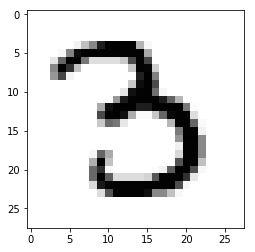

In [11]:
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()